In [2]:
import pandas as pd
df = pd.read_csv(r'/Users/zayed/Documents/Data analysis projects/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Now that the dataframe has been loaded, we can begin by conducting our initilization routines. 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.shape

(9994, 13)

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No nulls in the data set. Brilliant. 

In [6]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


The dataset has 9994 observations and 13 columns. 

- We have geographic information in the country, city, state, postal code, and region variables. 
- We have product information in the category, subcategory, sales and quantity variables. 
- We also have customer information in the segment variable and the shipping mode they used in the ship mode variable. 

The numeric variables seem to be largely without outliers. Some observations: 
- We only have 1 country (United States), so we can remove that column. 
- Standard class is the most popular ship mode, and Consumer is the biggest segment. Office supplies is the most frequent category. 
- The lowest sale was for 0.444$ and the largest was for 22638$. This suggests a large range in the purchases that customers are making, in terms of Dollar value. 
- The mean profit is only 28$ while the mean sale is 230$. That means less than 10% of the average sale is profit, reflecting the low margin nature of the supermarket industry. 
- Loss making orders can go up to 275% losses. We must place emphasis on these loss making sales to reduce them.
We will perform some analysis below to test these observations.

### Feature Engineering
Let us make some new columns that may prove to be useful later on in our analysis. 

In [7]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
#removing the country column as it is redundant
# df = df.drop('Country', inplace=True)
# Creating a price column that displays the price of one unit of the product
df['price'] = df['Sales']/df['Quantity']
#Creating a profit margin column to determine profitability of the transaction as a percentage
df['profit_margin'] = (df.Profit/df.Sales)*100
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,price,profit_margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840,11.25


In [9]:
df = df.drop('Country', axis = 1)
df.head()


,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,price,profit_margin
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800,16.00
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800,30.00
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840,11.25


In [10]:
df.columns = df.columns.str.lower() # rename columns to be lower case
df.head()

,ship mode,segment,city,state,postal code,region,category,sub-category,sales,quantity,discount,profit,price,profit_margin
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800,16.00
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800,30.00
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840,11.25


In [11]:
pd.options.display.float_format = '{:.2f}'.format
df.head()

,ship mode,segment,city,state,postal code,region,category,sub-category,sales,quantity,discount,profit,price,profit_margin
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.00,41.91,130.98,16.00
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.00,219.58,243.98,30.00
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.00,6.87,7.31,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.58,5,0.45,-383.03,191.52,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.37,2,0.20,2.52,11.18,11.25


We can now begin our anlaysis. We can investigate four things:
- The customers
- The products
- The georgraphic areas
- Financial and sales performance

### Financial and sales performance

In [12]:
# determine the overall financial performance of the firm
print('The total profit is', round(df.profit.sum(), 2), 'and the total sales is', round(df.sales.sum(), 2))
print('This means that the profit margin for the entire store is', round(df.profit.sum()/df.sales.sum() * 100, 2), '%')

The total profit is 286397.02 and the total sales is 2297200.86
This means that the profit margin for the entire store is 12.47 %


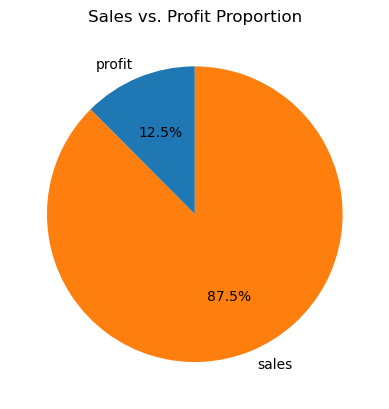

In [13]:
values = [df.profit.sum(), df.sales.sum() - df.profit.sum()]
labels1 = ['profit', 'sales']
plt.pie(values, labels = labels1, startangle=90, autopct='%1.1f%%')
plt.title('Sales vs. Profit Proportion')
plt.show()

We can see that the profit margin is 12.47% from $2,297,200 in sales. This means that the store made a profit of $286,397. 

The grocery industry operates on razor thing margins of 2-3% and rely on their high volume of sales to be worthwhile. However, this refers to net profit margins. Gross profit margins (which is what we have calculated) are usually between 20 and 30%. 

This indicates that there is much room for improvement here for the store. 

In [14]:
df.head()

,ship mode,segment,city,state,postal code,region,category,sub-category,sales,quantity,discount,profit,price,profit_margin
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.00,41.91,130.98,16.00
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.00,219.58,243.98,30.00
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.00,6.87,7.31,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.58,5,0.45,-383.03,191.52,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.37,2,0.20,2.52,11.18,11.25


In [15]:
# Let us see what the profit margin would be without selling items at a loss
dfpositive = df[df.profit_margin > 0] # removing all transactions where the store incurred a loss
print(dfpositive.profit.sum()/dfpositive.sales.sum()*100) #calculating profit margin

24.573890604159978


We can see that when we remove all transactions that was a net loss for the store, out profit margin dramatically shot up to a very respectable 24.5%. 
This indicates that the overall financial performance of the store can be dramatically improved if these transactions were addressed. 

## Product analysis
### Which category is the best selling, and which is the most profitable? 

In [16]:
category_analysis = df.groupby('category')[['sales', 'profit', 'quantity']].sum()
category_analysis

,sales,profit,quantity
category,,,
Furniture,741999.80,18451.27,8028
Office Supplies,719047.03,122490.80,22906
Technology,836154.03,145454.95,6939


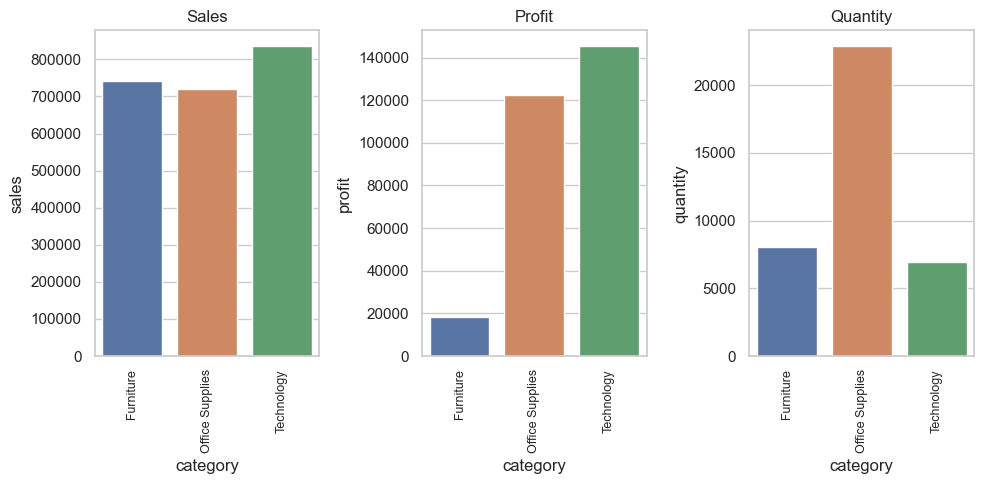

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

fig, axis = plt.subplots(1, 3, figsize=(10, 5))  # Creates 3 subplots in a row

plot1 = sns.barplot(x=category_analysis.index, y = category_analysis.sales, hue=category_analysis.index,ax=axis[0])
plot2 = sns.barplot(x=category_analysis.index, y = category_analysis.profit, hue=category_analysis.index,ax=axis[1])
plot3 = sns.barplot(x=category_analysis.index, y = category_analysis.quantity,hue=category_analysis.index, ax=axis[2])

plot1.set(title = 'Sales')
plot2.set(title = 'Profit')
plot3.set(title = 'Quantity')

plt.setp(plot1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(plot2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(plot3.get_xticklabels(), rotation = 'vertical', size = 9)

fig.tight_layout()

We can see that:
- All 3 categories - Furniture, Office Supplies and Technology make similar amount of sales.
- Technology is Best Selling and the Most Profitable too. These products are usually one-off purchases that can last at least a couple years.
- Although Furniture boasts a similar amount in sales as Technology does, it is the least profitable category and the quantity sold are the lowest too. 
- Office Supplies sells the most in terms of quantity as it is relatively cheap product. It also has pretty good profit margins, as it makes nearly as much profit as technology does. 

### What are the best selling and most profitable sub categories? 

<Axes: xlabel='sub-category', ylabel='sales'>

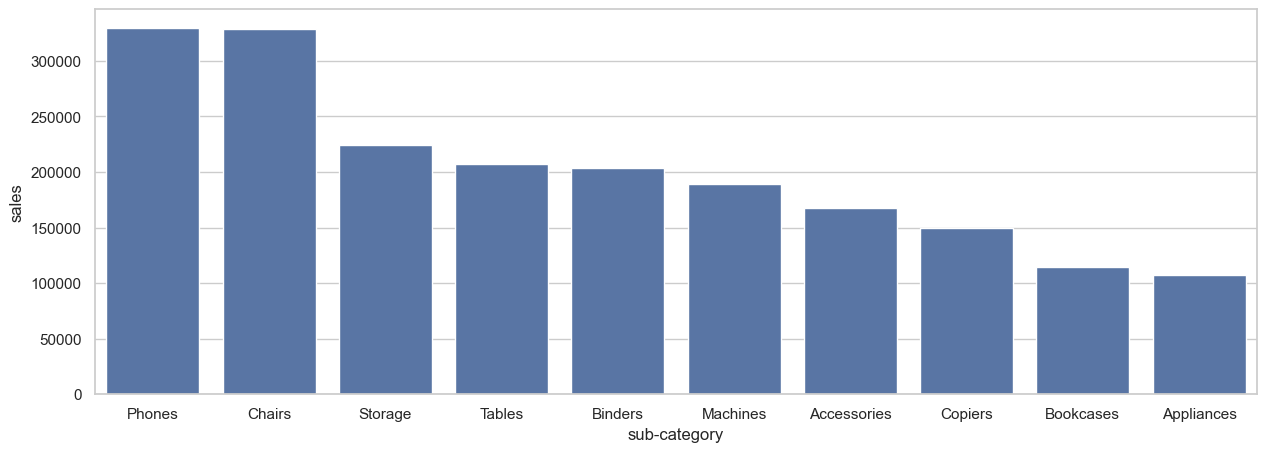

In [18]:
#Plotting the best selling subcategories
subcatanalysis = df.groupby(['category','sub-category'])[['sales', 'profit']].sum()

#Sort by descending order
subcat_sales = subcatanalysis.sort_values(by='sales', ascending=False)
subcat_sales.head(10)
plt.figure(figsize=(15,5))
sns.barplot(subcat_sales.head(10), x = 'sub-category',y= 'sales')

Phones and chairs are the most sub categories that bring the most sales. 

In [19]:
subcat_profit =subcatanalysis.sort_values(by='profit', ascending=False)
subcat_profit

sales    profit
category        sub-category                    
Technology      Copiers      149528.03  55617.82
                Phones       330007.05  44515.73
                Accessories  167380.32  41936.64
Office Supplies Paper         78479.21  34053.57
                Binders      203412.73  30221.76
Furniture       Chairs       328449.10  26590.17
Office Supplies Storage      223843.61  21278.83
                Appliances   107532.16  18138.01
Furniture       Furnishings   91705.16  13059.14
Office Supplies Envelopes     16476.40   6964.18
                Art           27118.79   6527.79
                Labels        12486.31   5546.25
Technology      Machines     189238.63   3384.76
Office Supplies Fasteners      3024.28    949.52
                Supplies      46673.54  -1189.10
Furniture       Bookcases    114880.00  -3472.56
                Tables       206965.53 -17725.48

/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_25095/4243517678.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subcat1.set_xticklabels(subcat_sales.index.get_level_values('sub-category'), rotation='vertical', size = 10)
/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_25095/4243517678.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subcat2.set_xticklabels(subcat_profit.index.get_level_values('sub-category'), rotation= 'vertical', size = 10)


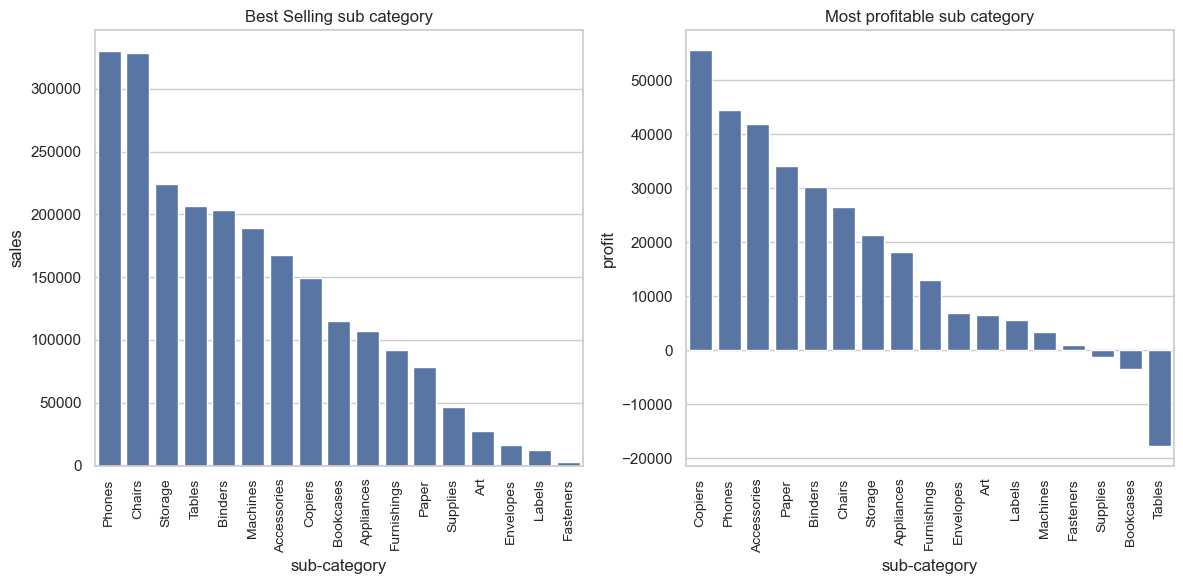

In [20]:
#plot bar plots
sns.set_theme(style='whitegrid')

fig, axis = plt.subplots(1,2,figsize = (12,6))

#bar plots for best selling sub categories
subcat1 = sns.barplot(data=subcat_sales, x = subcat_sales.index.get_level_values('sub-category'), y = subcat_sales.sales, ax=axis[0])
subcat1.set_title('Best Selling sub category')
subcat1.set_xticklabels(subcat_sales.index.get_level_values('sub-category'), rotation='vertical', size = 10)

subcat2 = sns.barplot(data=subcat_profit, x = subcat_profit.index.get_level_values('sub-category'), y = subcat_profit.profit, ax=axis[1])
subcat2.set_title('Most profitable sub category')
subcat2.set_xticklabels(subcat_profit.index.get_level_values('sub-category'), rotation= 'vertical', size = 10)

fig.tight_layout()

plt.show()

Let's analyse the bar plots:

- Phones and Chairs are Top 2 best selling sub-category.
- Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.
- On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

### What subcategory brings in the most profit per item sold?

In [21]:
# We want to find out which subcategory brings in the most profit per sale. 
df.head()
df['profit_per_sale'] = df.profit/df.quantity
df.head()

,ship mode,segment,city,state,postal code,region,category,sub-category,sales,quantity,discount,profit,price,profit_margin,profit_per_sale
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.00,41.91,130.98,16.00,20.96
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.00,219.58,243.98,30.00,73.19
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.00,6.87,7.31,47.00,3.44
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.58,5,0.45,-383.03,191.52,-40.00,-76.61
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.37,2,0.20,2.52,11.18,11.25,1.26


<Axes: xlabel='sub-category', ylabel='profit_per_sale'>

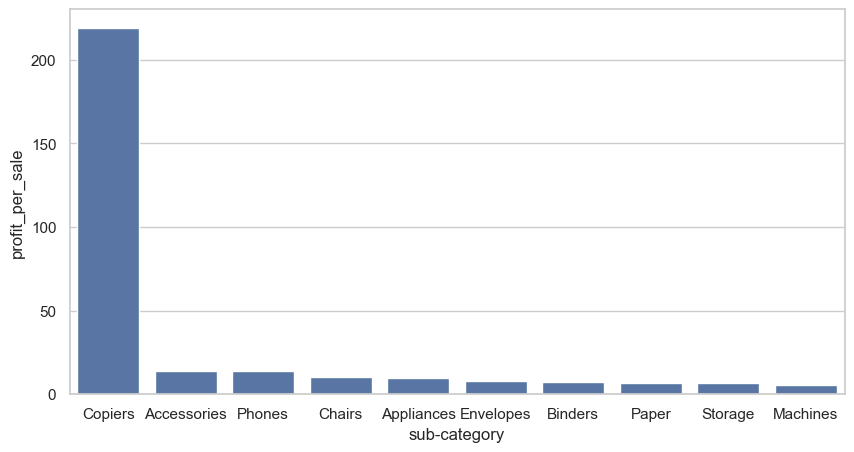

In [24]:
profitperitem = df.groupby('sub-category').profit_per_sale.mean().reset_index().sort_values(by='profit_per_sale', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(profitperitem, x = 'sub-category', y = 'profit_per_sale')

Copiers are by far the most profitable sub category per item sold. This suggests it may be profitable for the superstore to attempt to sell more copiers. 
Accessories and phones are in second place, and may also be worth pushing. 

## Customer anlaysis
### Which customer segment is most profitable? 

In [25]:
segment = df.groupby(['segment'])[['profit', 'sales']].sum().reset_index()
segment

,segment,profit,sales
0,Consumer,134119.21,1161401.34
1,Corporate,91979.13,706146.37
2,Home Office,60298.68,429653.15


Text(0.5, 1.0, 'Customer segment by profitability')

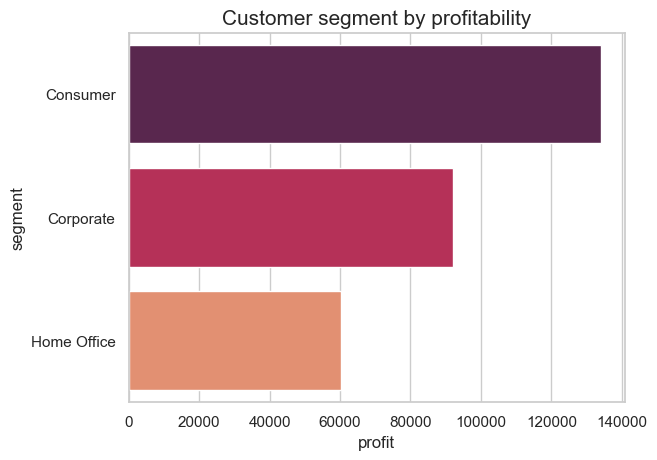

In [26]:
#plot bar plot for segments
sns.barplot(data=segment, y= segment.segment, x = segment.profit, hue = segment.segment, palette='rocket')
plt.title('Customer segment by profitability', size = 15)

In [31]:
segment_long

,segment,Metric,Value
0,Consumer,profit,134119.21
1,Corporate,profit,91979.13
2,Home Office,profit,60298.68
3,Consumer,sales,1161401.34
4,Corporate,sales,706146.37
5,Home Office,sales,429653.15


<Axes: xlabel='Value', ylabel='segment'>

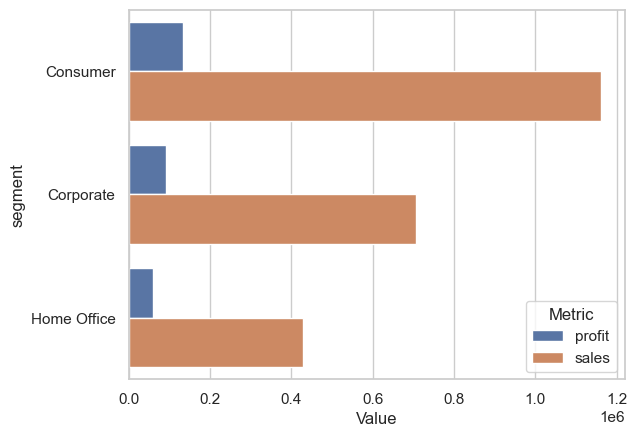

In [33]:
segment_long = segment.melt(id_vars='segment', value_vars=['profit', 'sales'],  var_name='Metric', value_name='Value')
sns.barplot(segment_long, x = 'Value', y = 'segment', hue= 'Metric')

Consumer segment is most profitable, followed by Corporate Segment and Home Office. 
Hence, Super store's marketing strategy must target and focus on retaining Consumer and Corporate Segment customers.

### What is the preferred ship mode? 

In [34]:
shipmode = df.groupby('ship mode')[['quantity']].sum()
shipmode

,quantity
ship mode,
First Class,5693
Same Day,1960
Second Class,7423
Standard Class,22797


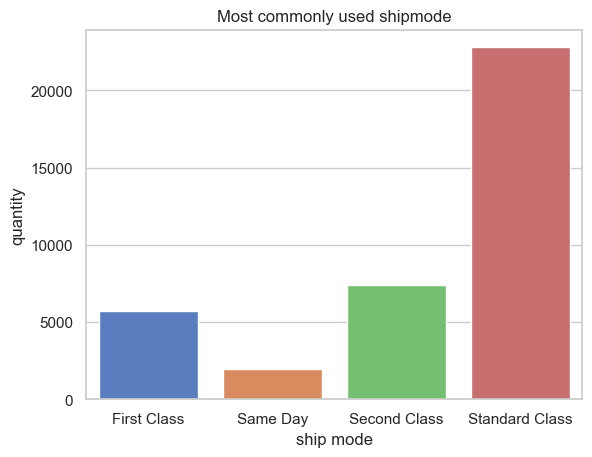

In [35]:
#plot bar plot
sns.set_theme(style='whitegrid')
sns.barplot(data=shipmode, x= shipmode.index, y= shipmode['quantity'], hue = shipmode.index, palette='muted')
plt.title('Most commonly used shipmode')
plt.show()

By a landslide, Standard Class is the preferred method of shipment and probably the cheapest option. The other modes are not popular among the customers as they may be too costly.

## Geographic analysis
### What region is the most profitable? 

In [40]:
region = df.groupby('region').profit.sum().reset_index().sort_values(by = 'profit', ascending=False)
region

,region,profit
3,West,108418.45
1,East,91522.78
2,South,46749.43
0,Central,39706.36


Text(0.5, 1.0, 'Most Profitable by Region')

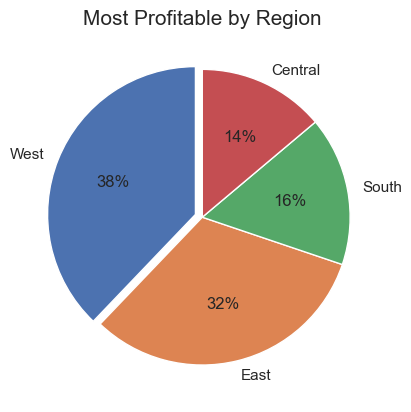

In [46]:
#plot pie chart
explode = [0.05, 0, 0, 0]
plt.pie(data=region, labels = region.region, x =region.profit, startangle=90, explode=explode, autopct="%1.0f%%")
plt.title("Most Profitable by Region", size = 15)

### What city has the most sales

In [47]:
topcities_sales = df.groupby('city')[['sales', 'quantity']].sum().sort_values(by='sales', ascending=False).head(10)
topcities_sales

,sales,quantity
city,,
New York City,256368.16,3417
Los Angeles,175851.34,2879
Seattle,119540.74,1590
San Francisco,112669.09,1935
Philadelphia,109077.01,1981
Houston,64504.76,1466
Chicago,48539.54,1132
San Diego,47521.03,670
Jacksonville,44713.18,429


/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_25095/2632824912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  top10c = sns.barplot(data= topcities_sales, x = topcities_sales.sales, y = topcities_sales.index, palette='coolwarm').set_title("Top 10 cities with the most sales", size = 15)


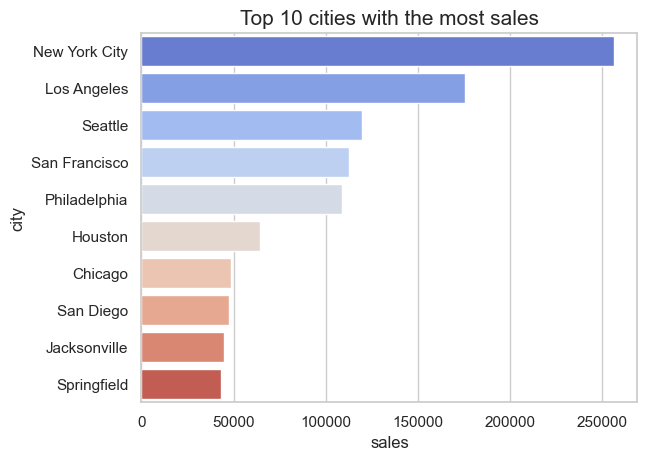

In [50]:
# Plot top 10 city by sales 
top10c = sns.barplot(data= topcities_sales, x = topcities_sales.sales, y = topcities_sales.index, palette='coolwarm').set_title("Top 10 cities with the most sales", size = 15)

There is a huge disparity between cities in terms of sales. We must keep this in mind when formulating our marketing strategy.

Here, we revisit our business questions and share with you our high-level business recommendations.

### Business Questions

Which Category is Best Selling and Most Profitable?
What are the Best Selling and Most Profitable Sub-Category?
Which is the Top Selling Sub-Category?
Which Customer Segment is Most Profitable?
Which is the Preferred Ship Mode?
Which Region is the Most Profitable?


### Recommendations

Focus on the Technology sub-category, as well as phones and chairs, which are the highest-selling and most profitable items. Bundle these with less profitable products like bookcases and tables to help offset losses.
Bookcases and tables generate significant losses. To mitigate this, bundle them with high-performing products such as chairs, copiers, phones, and office supplies to boost overall sales.
For home office customers, who may prefer convenience, offer a bundled home office package with essential items like tables, chairs, phones, copiers, storage units, labels, fasteners, and bookcases.
For loss-making products like supplies, bookcases, and tables, consider:
• Removing them from the catalog if they cannot be made profitable. • Negotiating with suppliers to secure better pricing. 5. The consumer and corporate segments account for over 70% of the customer base. Focus marketing efforts on these groups, especially in the east and west regions. Target the top 10 cities with the highest sales by offering special promotions, bundles tailored for mass consumers and home offices, and sending promotional emails or flyers.

Thank you.